In [1]:
import os
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')

from utilities import DataLoggerUtility as dlu
from utilities import DataPlotterUtility as dpu
from control_scripts import Device_History as DH
import launcher
import defaults

from matplotlib import pyplot as plt
import numpy as np

saveFolder = '../../../Publications/2018-04-30 Bias Stress ACS/Plots'

# %config InlineBackend.figure_format = 'svg'

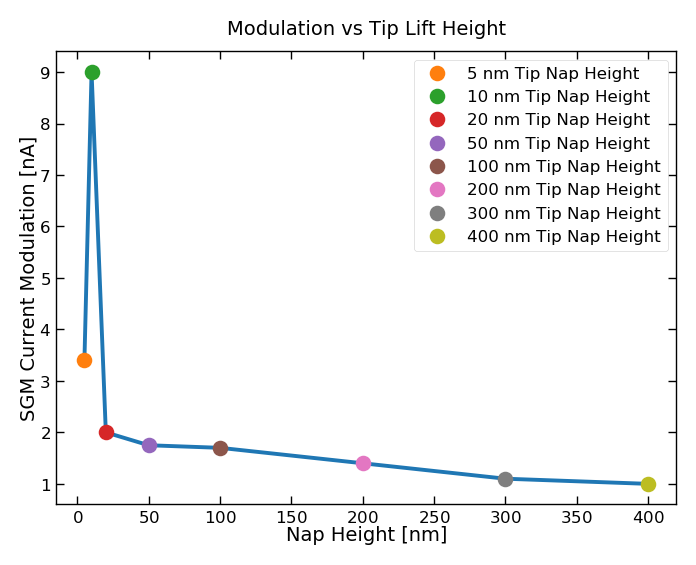

In [14]:
heights = [5,10,20,50,100,200,300,400]
modulations = [3.4,9,2,1.75,1.7,1.4,1.1,1]
plt.figure(figsize=(4,3), dpi=200)
plt.plot(heights, modulations)
for i in range(len(heights)):
    plt.plot(heights[i], modulations[i], 'o', label='{} nm Tip Nap Height'.format(heights[i]))

plt.title('Modulation vs Tip Lift Height')
plt.legend()
plt.xlabel('Nap Height [nm]')
plt.ylabel('SGM Current Modulation [nA]')
plt.show()

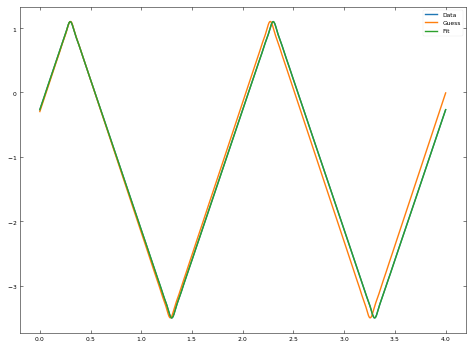

In [37]:
times = np.linspace(0,20,500)
period = 6
offset = 0
amplitude = 2

def triangleSine(x):
    coefficients = [(-1)**i*(2*i+1)**(-2)*np.sin((2*i+1)*x) for i in range(15)]
    wave = np.sum(coefficients, axis=0)
    return wave/np.max(wave)

def triangleSinWave(times, amplitude, period, phase, offset):
    return offset + amplitude*triangleSine(2*np.pi*(times - phase)/period)

def triangleCosWave(times, amplitude, period, phase, offset):
    return triangleSinWave(times, amplitude, period, phase - period/4, offset)

import scipy.optimize
import scipy.stats

results = {"vds_data": [0.1000002, 0.1, 0.0999999, 0.1, 0.1, 0.0999998, 0.1000001, 0.0999999, 0.1, 0.1000002, 0.1000001, 0.0999999, 0.1000001, 0.1, 0.1, 0.1, 0.0999999, 0.1000001, 0.0999997, 0.1, 0.0999998, 0.0999999, 0.1000002, 0.0999999, 0.1, 0.1, 0.1, 0.0999999, 0.1000001, 0.1, 0.0999999, 0.0999999, 0.0999999, 0.1000001, 0.1, 0.0999999, 0.1, 0.1, 0.0999998, 0.0999999, 0.0999999, 0.1000001, 0.0999999, 0.1, 0.1000002, 0.1, 0.1, 0.1, 0.1000001, 0.1, 0.1, 0.0999998, 0.1000002, 0.0999999, 0.0999999, 0.0999999, 0.0999999, 0.1000001, 0.0999998, 0.1, 0.1, 0.0999999, 0.1, 0.1, 0.0999999, 0.1, 0.1, 0.0999999, 0.1, 0.1, 0.1000001, 0.1, 0.0999998, 0.0999999, 0.1, 0.1000002, 0.1000002, 0.0999999, 0.1000001, 0.0999998, 0.0999998, 0.1, 0.1, 0.1, 0.1000001, 0.1, 0.1000001, 0.0999998, 0.1, 0.1, 0.0999997, 0.0999999, 0.0999999, 0.1000001, 0.0999999, 0.0999997, 0.1000001, 0.0999998, 0.1000001, 0.0999999, 0.0999998, 0.1000001, 0.1000001, 0.0999998, 0.1, 0.1, 0.0999999, 0.0999999, 0.1, 0.1000001, 0.0999999, 0.1, 0.1, 0.1, 0.1, 0.1000001, 0.0999998, 0.1000003, 0.1, 0.0999999, 0.0999997, 0.1000001, 0.1, 0.1, 0.0999999, 0.0999999, 0.1000001, 0.0999999, 0.0999999, 0.1, 0.0999999, 0.1000001, 0.0999998, 0.0999999, 0.1000001, 0.1, 0.1, 0.1, 0.1000001, 0.0999997, 0.1000002, 0.1, 0.0999998, 0.1000001, 0.1000001, 0.0999997, 0.1, 0.1, 0.0999999, 0.1, 0.1, 0.0999999, 0.1, 0.1000001, 0.0999999, 0.1000001, 0.1000002, 0.1, 0.1000002, 0.0999998, 0.1000001, 0.0999998, 0.0999998, 0.0999999, 0.0999999, 0.1000001, 0.0999998, 0.0999998, 0.1000002, 0.0999997, 0.1000002, 0.0999999, 0.0999999, 0.0999998, 0.1000002, 0.1000001, 0.1, 0.0999998, 0.0999998, 0.0999999, 0.1000002, 0.0999998, 0.0999997, 0.1, 0.1000001, 0.1, 0.0999999, 0.0999997, 0.1000001, 0.1, 0.1, 0.1, 0.1, 0.0999999, 0.1000001, 0.0999999, 0.1, 0.1, 0.0999997, 0.0999999, 0.1000001, 0.1, 0.1000001, 0.1000001, 0.0999999, 0.1000001, 0.0999999, 0.0999999, 0.0999999, 0.0999998, 0.1000001, 0.0999999, 0.0999999, 0.1000001, 0.1, 0.0999998, 0.1, 0.1, 0.0999998, 0.1000001, 0.1000001, 0.0999997, 0.0999999, 0.1000001, 0.1, 0.0999999, 0.1, 0.1000001, 0.0999999, 0.1, 0.1, 0.1000001, 0.1000001, 0.1000001, 0.0999999, 0.1, 0.0999998, 0.0999999, 0.1000001, 0.0999999], "id_data": [-2.11e-10, -2.09e-10, -2.06e-10, -2.08e-10, -2.06e-10, -2.08e-10, -2.05e-10, -2.09e-10, -2.12e-10, -2.13e-10, -2e-10, -2.12e-10, -2.14e-10, -2.13e-10, -2.11e-10, -2.1e-10, -2.17e-10, -2.14e-10, -2.14e-10, -2.12e-10, -2.16e-10, -2.17e-10, -2.18e-10, -2.2e-10, -2.15e-10, -2.14e-10, -2.18e-10, -2.14e-10, -2.16e-10, -2.15e-10, -2.17e-10, -2.16e-10, -2.18e-10, -2.17e-10, -2.18e-10, -2.14e-10, -2.15e-10, -2.15e-10, -2.24e-10, -2.19e-10, -2.16e-10, -2.17e-10, -2.18e-10, -2.16e-10, -2.22e-10, -2.19e-10, -2.21e-10, -2.18e-10, -2.18e-10, -2.2e-10, -2.22e-10, -2.16e-10, -2.19e-10, -2.16e-10, -2.16e-10, -2.23e-10, -2.21e-10, -2.21e-10, -2.16e-10, -2.19e-10, -2.17e-10, -2.22e-10, -2.2e-10, -2.19e-10, -2.2e-10, -2.22e-10, -2.18e-10, -2.21e-10, -2.18e-10, -2.22e-10, -2.15e-10, -2.2e-10, -2.22e-10, -2.24e-10, -2.25e-10, -2.22e-10, -2.19e-10, -2.16e-10, -2.16e-10, -2.2e-10, -2.22e-10, -2.15e-10, -2.19e-10, -2.23e-10, -2.21e-10, -2.21e-10, -2.17e-10, -2.19e-10, -2.18e-10, -2.17e-10, -2.16e-10, -2.22e-10, -2.23e-10, -2.2e-10, -2.22e-10, -2.22e-10, -2.2e-10, -2.23e-10, -2.23e-10, -2.21e-10, -2.25e-10, -2.2e-10, -2.2e-10, -2.19e-10, -2.25e-10, -2.22e-10, -2.2e-10, -2.2e-10, -2.22e-10, -2.18e-10, -2.2e-10, -2.2e-10, -2.21e-10, -2.18e-10, -2.23e-10, -2.19e-10, -2.23e-10, -2.25e-10, -2.29e-10, -2.26e-10, -2.27e-10, -2.22e-10, -2.25e-10, -2.23e-10, -2.24e-10, -2.21e-10, -2.2e-10, -2.28e-10, -2.28e-10, -2.22e-10, -2.3e-10, -2.21e-10, -2.22e-10, -2.27e-10, -2.25e-10, -2.24e-10, -2.27e-10, -2.24e-10, -2.18e-10, -2.22e-10, -2.2e-10, -2.19e-10, -2.26e-10, -2.22e-10, -2.22e-10, -2.22e-10, -2.21e-10, -2.22e-10, -2.2e-10, -2.26e-10, -2.2e-10, -2.22e-10, -2.22e-10, -2.19e-10, -2.26e-10, -2.21e-10, -2.2e-10, -2.23e-10, -2.25e-10, -2.19e-10, -2.19e-10, -2.17e-10, -2.24e-10, -2.26e-10, -2.21e-10, -2.21e-10, -2.17e-10, -2.18e-10, -2.22e-10, -2.25e-10, -2.24e-10, -2.24e-10, -2.24e-10, -2.22e-10, -2.26e-10, -2.19e-10, -2.2e-10, -2.2e-10, -2.25e-10, -2.23e-10, -2.24e-10, -2.23e-10, -2.25e-10, -2.21e-10, -2.22e-10, -2.21e-10, -2.22e-10, -2.19e-10, -2.24e-10, -2.2e-10, -2.22e-10, -2.18e-10, -2.25e-10, -2.21e-10, -2.21e-10, -2.26e-10, -2.19e-10, -2.27e-10, -2.26e-10, -2.23e-10, -2.23e-10, -2.21e-10, -2.27e-10, -2.24e-10, -2.25e-10, -2.21e-10, -2.23e-10, -2.25e-10, -2.22e-10, -2.21e-10, -2.19e-10, -2.23e-10, -2.23e-10, -2.27e-10, -2.25e-10, -2.23e-10, -2.22e-10, -2.23e-10, -2.28e-10, -2.26e-10, -2.24e-10, -2.25e-10, -2.23e-10, -2.22e-10, -2.22e-10, -2.21e-10, -2.23e-10, -2.19e-10, -2.25e-10, -2.22e-10, -2.25e-10, -2.25e-10, -2.24e-10, -2.24e-10, -2.23e-10, -2.25e-10, -2.21e-10, -2.2e-10, -2.22e-10, -2.25e-10], "vgs_data": [-15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0], "ig_data": [-1.092e-09, -1.086e-09, -1.08e-09, -1.067e-09, -1.059e-09, -1.056e-09, -1.048e-09, -1.046e-09, -1.038e-09, -1.029e-09, -2.9e-10, -9.76e-10, -9.84e-10, -9.86e-10, -9.81e-10, -9.84e-10, -9.8e-10, -9.78e-10, -9.8e-10, -9.7e-10, -9.66e-10, -9.66e-10, -9.58e-10, -9.54e-10, -9.5e-10, -9.54e-10, -9.52e-10, -9.43e-10, -9.4e-10, -9.41e-10, -9.35e-10, -9.33e-10, -9.33e-10, -9.34e-10, -9.29e-10, -9.29e-10, -9.24e-10, -9.25e-10, -9.22e-10, -9.12e-10, -9.14e-10, -9.1e-10, -9.13e-10, -9.07e-10, -9.1e-10, -9.03e-10, -9.04e-10, -9.07e-10, -8.99e-10, -9.04e-10, -8.96e-10, -8.95e-10, -9.01e-10, -8.88e-10, -8.91e-10, -8.92e-10, -8.93e-10, -8.9e-10, -8.94e-10, -8.89e-10, -8.85e-10, -8.92e-10, -8.87e-10, -8.87e-10, -8.76e-10, -8.82e-10, -8.85e-10, -8.79e-10, -8.78e-10, -8.77e-10, -8.78e-10, -8.75e-10, -8.78e-10, -8.75e-10, -8.76e-10, -8.74e-10, -8.72e-10, -8.68e-10, -8.73e-10, -8.66e-10, -8.71e-10, -8.7e-10, -8.67e-10, -8.7e-10, -8.71e-10, -8.64e-10, -8.65e-10, -8.61e-10, -8.63e-10, -8.65e-10, -8.58e-10, -8.63e-10, -8.52e-10, -8.62e-10, -8.59e-10, -8.58e-10, -8.57e-10, -8.52e-10, -8.54e-10, -8.57e-10, -8.52e-10, -8.54e-10, -8.53e-10, -8.52e-10, -8.47e-10, -8.51e-10, -8.49e-10, -8.49e-10, -8.49e-10, -8.51e-10, -8.46e-10, -8.4e-10, -8.47e-10, -8.47e-10, -8.47e-10, -8.45e-10, -8.45e-10, -8.41e-10, -8.43e-10, -8.42e-10, -8.44e-10, -8.43e-10, -8.4e-10, -8.37e-10, -8.3e-10, -8.35e-10, -8.34e-10, -8.36e-10, -8.29e-10, -8.35e-10, -1.558e-09, -8.7e-10, -8.6e-10, -8.49e-10, -8.51e-10, -8.45e-10, -8.46e-10, -8.5e-10, -8.42e-10, -8.42e-10, -8.45e-10, -8.45e-10, -8.41e-10, -8.44e-10, -8.37e-10, -8.39e-10, -8.35e-10, -8.29e-10, -8.4e-10, -8.32e-10, -8.34e-10, -8.27e-10, -8.3e-10, -8.3e-10, -8.27e-10, -8.32e-10, -8.34e-10, -8.31e-10, -8.29e-10, -8.27e-10, -8.22e-10, -8.21e-10, -8.19e-10, -8.25e-10, -8.24e-10, -8.25e-10, -8.16e-10, -8.22e-10, -8.21e-10, -8.25e-10, -8.25e-10, -8.21e-10, -8.18e-10, -8.19e-10, -8.18e-10, -8.19e-10, -8.15e-10, -8.15e-10, -8.07e-10, -8.15e-10, -8.18e-10, -8.15e-10, -8.09e-10, -8.15e-10, -8.14e-10, -8.15e-10, -8.14e-10, -8.17e-10, -8.15e-10, -8.15e-10, -8.08e-10, -8.11e-10, -8.11e-10, -8.12e-10, -8.12e-10, -8.06e-10, -8.11e-10, -8.15e-10, -8.08e-10, -8.13e-10, -8.09e-10, -8.06e-10, -8.06e-10, -8.06e-10, -8.07e-10, -8.09e-10, -8.07e-10, -8.11e-10, -8.04e-10, -8.06e-10, -8.07e-10, -8.03e-10, -8.08e-10, -8.01e-10, -8.04e-10, -8.02e-10, -8e-10, -8.06e-10, -8.04e-10, -8.05e-10, -8.04e-10, -8e-10, -8.04e-10, -7.97e-10, -7.98e-10, -7.99e-10, -8e-10, -8.01e-10, -8.02e-10, -8.07e-10, -8.04e-10, -8.02e-10, -8.01e-10, -7.99e-10, -8.01e-10, -8.03e-10, -7.96e-10, -7.99e-10, -8.01e-10, -7.98e-10], "timestamps_device": [1536070943.9300547, 1536070943.9467216, 1536070943.9633887, 1536070943.9800556, 1536070943.9967227, 1536070944.0133896, 1536070944.0300567, 1536070944.0467236, 1536070944.0633907, 1536070944.0800576, 1536070944.0967247, 1536070944.1133916, 1536070944.1300588, 1536070944.1467257, 1536070944.1633928, 1536070944.1800597, 1536070944.1967266, 1536070944.2133937, 1536070944.2300606, 1536070944.2467277, 1536070944.2633946, 1536070944.2800617, 1536070944.2967286, 1536070944.3133957, 1536070944.3300626, 1536070944.3467298, 1536070944.3633966, 1536070944.3800638, 1536070944.3967307, 1536070944.4133976, 1536070944.4300647, 1536070944.4467316, 1536070944.4633987, 1536070944.4800656, 1536070944.4967327, 1536070944.5133996, 1536070944.5300667, 1536070944.5467336, 1536070944.5634007, 1536070944.5800676, 1536070944.5967348, 1536070944.6134017, 1536070944.6300688, 1536070944.6467357, 1536070944.6634026, 1536070944.6800697, 1536070944.6967366, 1536070944.7134037, 1536070944.7300706, 1536070944.7467377, 1536070944.7634046, 1536070944.7800717, 1536070944.7967386, 1536070944.8134058, 1536070944.8300726, 1536070944.8467398, 1536070944.8634067, 1536070944.8800735, 1536070944.8967407, 1536070944.9134076, 1536070944.9300747, 1536070944.9467416, 1536070944.9634087, 1536070944.9800756, 1536070944.9967427, 1536070945.0134096, 1536070945.0300767, 1536070945.0467436, 1536070945.0634108, 1536070945.0800776, 1536070945.0967448, 1536070945.1134117, 1536070945.1300786, 1536070945.1467457, 1536070945.1634126, 1536070945.1800797, 1536070945.1967466, 1536070945.2134137, 1536070945.2300806, 1536070945.2467477, 1536070945.2634146, 1536070945.2800817, 1536070945.2967486, 1536070945.3134158, 1536070945.3300827, 1536070945.3467498, 1536070945.3634167, 1536070945.3800836, 1536070945.3967507, 1536070945.4134176, 1536070945.4300847, 1536070945.4467516, 1536070945.4634187, 1536070945.4800856, 1536070945.4967527, 1536070945.5134196, 1536070945.5300868, 1536070945.5467536, 1536070945.5634208, 1536070945.5800877, 1536070945.5967546, 1536070945.6134217, 1536070945.6300886, 1536070945.6467557, 1536070945.6634226, 1536070945.6800897, 1536070945.6967566, 1536070945.7134237, 1536070945.7300906, 1536070945.7467577, 1536070945.7634246, 1536070945.7800918, 1536070945.7967587, 1536070945.8134258, 1536070945.8300927, 1536070945.8467596, 1536070945.8634267, 1536070945.8800936, 1536070945.8967607, 1536070945.9134276, 1536070945.9300947, 1536070945.9467616, 1536070945.9634287, 1536070945.9800956, 1536070945.9967628, 1536070946.0134296, 1536070946.0300968, 1536070946.0467637, 1536070946.0634305, 1536070946.0800977, 1536070946.0967646, 1536070946.1134317, 1536070946.1300986, 1536070946.1467657, 1536070946.1634326, 1536070946.1800997, 1536070946.1967666, 1536070946.2134337, 1536070946.2301006, 1536070946.2467678, 1536070946.2634346, 1536070946.2801018, 1536070946.2967687, 1536070946.3134356, 1536070946.3301027, 1536070946.3467696, 1536070946.3634367, 1536070946.3801036, 1536070946.3967707, 1536070946.4134376, 1536070946.4301047, 1536070946.4467716, 1536070946.4634387, 1536070946.4801056, 1536070946.4967728, 1536070946.5134397, 1536070946.5301068, 1536070946.5467737, 1536070946.5634406, 1536070946.5801077, 1536070946.5967746, 1536070946.6134417, 1536070946.6301086, 1536070946.6467757, 1536070946.6634426, 1536070946.6801097, 1536070946.6967766, 1536070946.7134438, 1536070946.7301106, 1536070946.7467778, 1536070946.7634447, 1536070946.7801116, 1536070946.7967787, 1536070946.8134456, 1536070946.8301127, 1536070946.8467796, 1536070946.8634467, 1536070946.8801136, 1536070946.8967807, 1536070946.9134476, 1536070946.9301147, 1536070946.9467816, 1536070946.9634488, 1536070946.9801157, 1536070946.9967828, 1536070947.0134497, 1536070947.0301166, 1536070947.0467837, 1536070947.0634506, 1536070947.0801177, 1536070947.0967846, 1536070947.1134517, 1536070947.1301186, 1536070947.1467857, 1536070947.1634526, 1536070947.1801198, 1536070947.1967866, 1536070947.2134538, 1536070947.2301207, 1536070947.2467875, 1536070947.2634547, 1536070947.2801216, 1536070947.2967887, 1536070947.3134556, 1536070947.3301227, 1536070947.3467896, 1536070947.3634567, 1536070947.3801236, 1536070947.3967907, 1536070947.4134576, 1536070947.4301248, 1536070947.4467916, 1536070947.4634588, 1536070947.4801257, 1536070947.4967926, 1536070947.5134597, 1536070947.5301266, 1536070947.5467937, 1536070947.5634606, 1536070947.5801277, 1536070947.5967946, 1536070947.6134617, 1536070947.6301286, 1536070947.6467957, 1536070947.6634626, 1536070947.6801298, 1536070947.6967967, 1536070947.7134638, 1536070947.7301307, 1536070947.7467976, 1536070947.7634647, 1536070947.7801316, 1536070947.7967987, 1536070947.8134656, 1536070947.8301327, 1536070947.8467996, 1536070947.8634667, 1536070947.8801336, 1536070947.8968008, 1536070947.9134676], "smu2_v1_data": [-0.90638, -0.90634, -0.90644, -0.90637, -0.90659, -0.90611, -0.90661, -0.90642, -0.90079, -0.87807, -0.88257, -0.88268, -0.88261, -0.88279, -0.88273, -0.88284, -0.8828, -0.88278, -0.88287, -0.88279, -0.88284, -0.88282, -0.88312, -0.8824, -0.88279, -0.88275, -0.88272, -0.88282, -0.88281, -0.88286, -0.88281, -0.88293, -0.88286, -0.88295, -0.88279, -0.88288, -0.88287, -0.88292, -0.88288, -0.88293, -0.88295, -0.88289, -0.88276, -0.88301, -0.88291, -0.88291, -0.883, -0.88287, -0.88297, -0.88292, -0.88295, -0.88286, -0.88287, -0.88279, -0.88284, -0.88289, -0.8829, -0.88294, -0.88286, -0.88317, -0.88257, -0.88306, -0.88289, -0.8829, -0.883, -0.88289, -0.88304, -0.88287, -0.88295, -0.8829, -0.88296, -0.88281, -0.88293, -0.88292, -0.88286, -0.8828, -0.8829, -0.88303, -0.88275, -0.88294, -0.88304, -0.88291, -0.88289, -0.88292, -0.88292, -0.88287, -0.88295, -0.88299, -0.88299, -0.88295, -0.88298, -0.88296, -0.88297, -0.88291, -0.883, -0.88284, -0.88315, -0.88265, -0.88311, -0.88292, -0.88288, -0.88294, -0.88295, -0.88303, -0.8829, -0.88304, -0.88294, -0.88298, -0.88293, -0.88294, -0.88288, -0.88289, -0.8829, -0.88296, -0.88315, -0.88265, -0.88304, -0.88303, -0.88301, -0.88299, -0.88302, -0.88312, -0.88294, -0.88304, -0.88296, -0.88298, -0.88298, -0.88303, -0.88381, -0.88485, -0.88477, -0.88492, -0.8849, -0.88485, -0.88466, -0.88497, -0.88482, -0.88474, -0.88484, -0.8848, -0.88491, -0.88492, -0.88486, -0.88476, -0.88484, -0.88489, -0.88485, -0.88487, -0.8848, -0.88485, -0.88483, -0.88512, -0.8844, -0.88496, -0.88482, -0.88478, -0.88487, -0.88479, -0.88492, -0.88479, -0.88494, -0.88482, -0.88491, -0.88484, -0.88489, -0.88488, -0.88485, -0.88472, -0.88485, -0.88495, -0.88458, -0.88473, -0.8849, -0.88469, -0.88478, -0.88479, -0.8848, -0.88477, -0.88484, -0.88481, -0.88478, -0.88477, -0.88483, -0.88481, -0.88479, -0.88468, -0.88483, -0.88474, -0.88494, -0.88452, -0.88487, -0.88473, -0.88478, -0.88485, -0.88476, -0.88486, -0.88471, -0.8848, -0.88478, -0.88479, -0.88469, -0.88477, -0.8848, -0.88468, -0.88475, -0.88478, -0.88497, -0.88451, -0.88481, -0.88477, -0.88472, -0.88476, -0.88471, -0.88478, -0.88467, -0.88469, -0.88472, -0.88478, -0.88464, -0.88476, -0.88467, -0.88476, -0.88474, -0.88477, -0.88479, -0.88475, -0.88459, -0.88489, -0.88477, -0.88471, -0.88477, -0.88475, -0.88482, -0.88478, -0.88485, -0.88476, -0.88477, -0.8848, -0.88473, -0.8847], "smu2_i1_data": [1e-14, -1e-14, -1e-14, 0.0, -3e-14, 1e-14, 1e-14, -1e-14, -4.6e-13, -1e-14, 2e-14, -1e-14, -1e-14, -1e-14, 1e-14, 0.0, 1e-14, 2e-14, 1e-14, 0.0, 0.0, 0.0, 1e-14, -2e-14, 1e-14, -1e-14, 0.0, 0.0, 1e-14, 1e-14, 1e-14, 0.0, -1e-14, -1e-14, -2e-14, -1e-14, 0.0, -1e-14, -2e-14, -1e-14, -1e-14, -2e-14, 1e-14, 0.0, 0.0, 0.0, 0.0, 0.0, -1e-14, 1e-14, -2e-14, 1e-14, -1e-14, -1e-14, -1e-14, -1e-14, -1e-14, 0.0, 0.0, 0.0, 1e-14, 1e-14, 0.0, 1e-14, 1e-14, -1e-14, -1e-14, 1e-14, -2e-14, -1e-14, 0.0, 1e-14, 0.0, 1e-14, -1e-14, -1e-14, -1e-14, 2e-14, -1e-14, 1e-14, 0.0, -1e-14, 1e-14, -1e-14, 0.0, 1e-14, -1e-14, -1e-14, 0.0, -1e-14, 0.0, -3e-14, -1e-14, 0.0, 1e-14, 0.0, -3e-14, 0.0, -1e-14, 0.0, 1e-14, -1e-14, 1e-14, 0.0, 0.0, -1e-14, 1e-14, 1e-14, 2e-14, -1e-14, 2e-14, 0.0, -1e-14, 0.0, -1e-14, -1e-14, 0.0, 0.0, -1e-14, 0.0, -2e-14, 0.0, 0.0, 1e-14, 1e-14, 0.0, 1e-14, 1e-14, 4e-14, 0.0, 1e-14, 1e-14, 1e-14, -3e-14, 2e-14, -3e-14, 1e-14, 0.0, 0.0, 0.0, 1e-14, 1e-14, -1e-14, 0.0, -1e-14, 0.0, 0.0, 0.0, -1e-14, 1e-14, 1e-14, 0.0, 1e-14, -1e-14, -1e-14, -2e-14, 0.0, 1e-14, 0.0, 0.0, 2e-14, -2e-14, 1e-14, 1e-14, -1e-14, 0.0, -1e-14, -2e-14, -1e-14, -1e-14, -3e-14, 0.0, -1e-14, 0.0, 1e-14, -1e-14, 0.0, -2e-14, 0.0, -1e-14, -1e-14, 1e-14, 2e-14, -1e-14, -1e-14, 0.0, 0.0, 0.0, -3e-14, 0.0, 0.0, -1e-14, 2e-14, 1e-14, 1e-14, 2e-14, 1e-14, 0.0, 0.0, 1e-14, -3e-14, 0.0, -1e-14, -1e-14, 2e-14, -3e-14, 2e-14, -2e-14, 0.0, -1e-14, 0.0, 0.0, 0.0, 0.0, -1e-14, 0.0, 0.0, 0.0, 1e-14, -2e-14, 0.0, 0.0, -2e-14, 0.0, 0.0, -2e-14, 0.0, 2e-14, -1e-14, -1e-14, -1e-14, 0.0, 0.0, -1e-14, 0.0, 2e-14, 0.0, 1e-14, -1e-14, -1e-14], "smu2_v2_data": [2.24135, 2.26944, 2.29766, 2.32491, 2.3498, 2.37089, 2.386, 2.39462, 2.39753, 2.39167, 2.37982, 2.36077, 2.33688, 2.31024, 2.28181, 2.25343, 2.22529, 2.19718, 2.16886, 2.14085, 2.1127, 2.08425, 2.0566, 2.02821, 2.00017, 1.97218, 1.94381, 1.91577, 1.88772, 1.85969, 1.83166, 1.80349, 1.77536, 1.74732, 1.71925, 1.69115, 1.6631, 1.63485, 1.60674, 1.57888, 1.55029, 1.52242, 1.49426, 1.46609, 1.43822, 1.40975, 1.38203, 1.35381, 1.3256, 1.29754, 1.26957, 1.24143, 1.21349, 1.18547, 1.15715, 1.12918, 1.10101, 1.07283, 1.04495, 1.01664, 0.98856, 0.96061, 0.93223, 0.90512, 0.88015, 0.85927, 0.84395, 0.8353, 0.83382, 0.83947, 0.85252, 0.87116, 0.8951, 0.92172, 0.95022, 0.97866, 1.00672, 1.03485, 1.06294, 1.09096, 1.11923, 1.14727, 1.17542, 1.20366, 1.23167, 1.25977, 1.28775, 1.31584, 1.34385, 1.37216, 1.40007, 1.42838, 1.45634, 1.48421, 1.51277, 1.54049, 1.56877, 1.59708, 1.62502, 1.65311, 1.6814, 1.70936, 1.73746, 1.76559, 1.79357, 1.82187, 1.84994, 1.87786, 1.90604, 1.93403, 1.96214, 1.99042, 2.01833, 2.04652, 2.07453, 2.1026, 2.13064, 2.15875, 2.18694, 2.21505, 2.24329, 2.27117, 2.29957, 2.32662, 2.35167, 2.37263, 2.38772, 2.39647, 2.39704, 2.39029, 2.37755, 2.35868, 2.33484, 2.30816, 2.27992, 2.25145, 2.22332, 2.19529, 2.16691, 2.13897, 2.11046, 2.08247, 2.05459, 2.0261, 1.99821, 1.97009, 1.94186, 1.91382, 1.88585, 1.85772, 1.82972, 1.8016, 1.77349, 1.74555, 1.71732, 1.68927, 1.6613, 1.63293, 1.60494, 1.57689, 1.54845, 1.52061, 1.49237, 1.46427, 1.4361, 1.40823, 1.3801, 1.35197, 1.32381, 1.29563, 1.26776, 1.23958, 1.21168, 1.18361, 1.15526, 1.12736, 1.09919, 1.07117, 1.04306, 1.01485, 0.98683, 0.95879, 0.9305, 0.90325, 0.8784, 0.85749, 0.84215, 0.83359, 0.83185, 0.83795, 0.85056, 0.86943, 0.89333, 0.91981, 0.94839, 0.97678, 1.00487, 1.03309, 1.06115, 1.08923, 1.11745, 1.14562, 1.17353, 1.20195, 1.22988, 1.2579, 1.28609, 1.314, 1.34219, 1.37037, 1.39833, 1.42666, 1.45433, 1.48272, 1.51087, 1.53891, 1.56701, 1.59529, 1.62338, 1.65139, 1.67968, 1.7076, 1.73576, 1.76393, 1.79182, 1.82026, 1.84816, 1.87621, 1.90435, 1.93231, 1.96044, 1.98858, 2.01662, 2.04471, 2.07282, 2.10085, 2.12878, 2.15723, 2.18503, 2.21351], "smu2_i2_data": [-5.5e-13, -5.5e-13, -6e-13, -5.6e-13, -4.8e-13, -3.7e-13, -2.3e-13, -1.1e-13, 1e-14, 2e-13, 2.9e-13, 4.2e-13, 5.1e-13, 5.7e-13, 5.8e-13, 5.6e-13, 5.4e-13, 5.8e-13, 6e-13, 5.7e-13, 5.9e-13, 5.8e-13, 5.8e-13, 5.9e-13, 5.3e-13, 5.4e-13, 5.9e-13, 5.9e-13, 5.8e-13, 5.6e-13, 5.8e-13, 5.8e-13, 5.9e-13, 5.4e-13, 5.3e-13, 5.6e-13, 5.8e-13, 5.6e-13, 5.2e-13, 5.5e-13, 5.7e-13, 5.8e-13, 5.7e-13, 5.4e-13, 5.8e-13, 5.8e-13, 6e-13, 5.5e-13, 5.6e-13, 5.8e-13, 5.9e-13, 5.8e-13, 5.2e-13, 5.4e-13, 5.6e-13, 5.8e-13, 5.8e-13, 5.6e-13, 5.9e-13, 6.1e-13, 5.7e-13, 5.5e-13, 5.4e-13, 5.5e-13, 5e-13, 3.8e-13, 2.3e-13, 1e-13, -6e-14, -2.1e-13, -3.1e-13, -4.8e-13, -5.5e-13, -5.3e-13, -5.7e-13, -5.8e-13, -6.1e-13, -6e-13, -5.9e-13, -6e-13, -5.9e-13, -6e-13, -5.5e-13, -5.4e-13, -5.5e-13, -5.8e-13, -5.8e-13, -5.7e-13, -5.7e-13, -5.8e-13, -6.2e-13, -5.9e-13, -5.5e-13, -5.8e-13, -6.1e-13, -6e-13, -6.1e-13, -5.4e-13, -5.5e-13, -5.8e-13, -5.6e-13, -5.4e-13, -5.3e-13, -5.7e-13, -5.8e-13, -5.9e-13, -5.6e-13, -5.5e-13, -5.7e-13, -5.8e-13, -5.6e-13, -5.2e-13, -5.6e-13, -5.8e-13, -5.8e-13, -6e-13, -5.9e-13, -6e-13, -5.8e-13, -5.6e-13, -5.6e-13, -5.5e-13, -5.9e-13, -5.5e-13, -4.7e-13, -3.7e-13, -2.4e-13, -1e-13, 1e-13, 1.8e-13, 3.3e-13, 4.3e-13, 5.3e-13, 5.9e-13, 5.6e-13, 5.3e-13, 5.4e-13, 5.9e-13, 5.8e-13, 5.7e-13, 5.9e-13, 5.8e-13, 6e-13, 5.8e-13, 5.3e-13, 5.5e-13, 5.7e-13, 5.6e-13, 5.4e-13, 5.4e-13, 5.7e-13, 6e-13, 5.7e-13, 5.4e-13, 5.5e-13, 5.6e-13, 5.9e-13, 5.7e-13, 5.6e-13, 5.8e-13, 6e-13, 5.8e-13, 5.6e-13, 5.3e-13, 5.5e-13, 5.8e-13, 5.8e-13, 5.4e-13, 5.6e-13, 5.6e-13, 5.8e-13, 5.6e-13, 5.3e-13, 5.6e-13, 5.8e-13, 5.8e-13, 5.8e-13, 5.7e-13, 5.9e-13, 5.8e-13, 5.6e-13, 5.4e-13, 5.4e-13, 5.5e-13, 4.7e-13, 3.7e-13, 2.4e-13, 9e-14, -5e-14, -2.2e-13, -3.1e-13, -4.7e-13, -5.2e-13, -5.2e-13, -5.5e-13, -5.4e-13, -5.7e-13, -6e-13, -5.9e-13, -5.8e-13, -6.1e-13, -5.9e-13, -5.7e-13, -5.5e-13, -5.4e-13, -5.8e-13, -5.9e-13, -5.7e-13, -5.6e-13, -5.7e-13, -6e-13, -5.8e-13, -5.5e-13, -5.5e-13, -5.9e-13, -5.9e-13, -5.7e-13, -5.4e-13, -5.5e-13, -5.8e-13, -6e-13, -5.6e-13, -5.6e-13, -5.7e-13, -5.9e-13, -5.9e-13, -5.6e-13, -5.6e-13, -5.9e-13, -5.9e-13, -5.7e-13, -5.3e-13, -5.6e-13, -5.9e-13, -6e-13, -5.8e-13, -5.8e-13, -5.9e-13, -6.1e-13, -5.9e-13], "timestamps_smu2": [1536070943.9340518, 1536070943.9507186, 1536070943.9673858, 1536070943.9840527, 1536070944.0007198, 1536070944.0173867, 1536070944.0340538, 1536070944.0507207, 1536070944.0673878, 1536070944.0840547, 1536070944.1007218, 1536070944.1173887, 1536070944.1340559, 1536070944.1507227, 1536070944.1673899, 1536070944.1840568, 1536070944.2007236, 1536070944.2173908, 1536070944.2340577, 1536070944.2507248, 1536070944.2673917, 1536070944.2840588, 1536070944.3007257, 1536070944.3173928, 1536070944.3340597, 1536070944.3507268, 1536070944.3673937, 1536070944.3840609, 1536070944.4007277, 1536070944.4173946, 1536070944.4340618, 1536070944.4507287, 1536070944.4673958, 1536070944.4840627, 1536070944.5007298, 1536070944.5173967, 1536070944.5340638, 1536070944.5507307, 1536070944.5673978, 1536070944.5840647, 1536070944.6007318, 1536070944.6173987, 1536070944.6340659, 1536070944.6507328, 1536070944.6673996, 1536070944.6840668, 1536070944.7007337, 1536070944.7174008, 1536070944.7340677, 1536070944.7507348, 1536070944.7674017, 1536070944.7840688, 1536070944.8007357, 1536070944.8174028, 1536070944.8340697, 1536070944.8507369, 1536070944.8674037, 1536070944.8840706, 1536070944.9007378, 1536070944.9174047, 1536070944.9340718, 1536070944.9507387, 1536070944.9674058, 1536070944.9840727, 1536070945.0007398, 1536070945.0174067, 1536070945.0340738, 1536070945.0507407, 1536070945.0674078, 1536070945.0840747, 1536070945.1007419, 1536070945.1174088, 1536070945.1340756, 1536070945.1507428, 1536070945.1674097, 1536070945.1840768, 1536070945.2007437, 1536070945.2174108, 1536070945.2340777, 1536070945.2507448, 1536070945.2674117, 1536070945.2840788, 1536070945.3007457, 1536070945.3174129, 1536070945.3340797, 1536070945.3507469, 1536070945.3674138, 1536070945.3840806, 1536070945.4007478, 1536070945.4174147, 1536070945.4340818, 1536070945.4507487, 1536070945.4674158, 1536070945.4840827, 1536070945.5007498, 1536070945.5174167, 1536070945.5340838, 1536070945.5507507, 1536070945.5674179, 1536070945.5840847, 1536070945.6007516, 1536070945.6174188, 1536070945.6340857, 1536070945.6507528, 1536070945.6674197, 1536070945.6840868, 1536070945.7007537, 1536070945.7174208, 1536070945.7340877, 1536070945.7507548, 1536070945.7674217, 1536070945.7840889, 1536070945.8007557, 1536070945.8174229, 1536070945.8340898, 1536070945.8507566, 1536070945.8674238, 1536070945.8840907, 1536070945.9007578, 1536070945.9174247, 1536070945.9340918, 1536070945.9507587, 1536070945.9674258, 1536070945.9840927, 1536070946.0007598, 1536070946.0174267, 1536070946.0340939, 1536070946.0507607, 1536070946.0674276, 1536070946.0840948, 1536070946.1007617, 1536070946.1174288, 1536070946.1340957, 1536070946.1507628, 1536070946.1674297, 1536070946.1840968, 1536070946.2007637, 1536070946.2174308, 1536070946.2340977, 1536070946.2507648, 1536070946.2674317, 1536070946.2840989, 1536070946.3007658, 1536070946.3174326, 1536070946.3340998, 1536070946.3507667, 1536070946.3674338, 1536070946.3841007, 1536070946.4007678, 1536070946.4174347, 1536070946.4341018, 1536070946.4507687, 1536070946.4674358, 1536070946.4841027, 1536070946.5007699, 1536070946.5174367, 1536070946.5341039, 1536070946.5507708, 1536070946.5674376, 1536070946.5841048, 1536070946.6007717, 1536070946.6174388, 1536070946.6341057, 1536070946.6507728, 1536070946.6674397, 1536070946.6841068, 1536070946.7007737, 1536070946.7174408, 1536070946.7341077, 1536070946.7507749, 1536070946.7674417, 1536070946.7841086, 1536070946.8007758, 1536070946.8174427, 1536070946.8341098, 1536070946.8507767, 1536070946.8674438, 1536070946.8841107, 1536070946.9007778, 1536070946.9174447, 1536070946.9341118, 1536070946.9507787, 1536070946.9674459, 1536070946.9841127, 1536070947.0007799, 1536070947.0174468, 1536070947.0341136, 1536070947.0507808, 1536070947.0674477, 1536070947.0841148, 1536070947.1007817, 1536070947.1174488, 1536070947.1341157, 1536070947.1507828, 1536070947.1674497, 1536070947.1841168, 1536070947.2007837, 1536070947.2174509, 1536070947.2341177, 1536070947.2507846, 1536070947.2674518, 1536070947.2841187, 1536070947.3007858, 1536070947.3174527, 1536070947.3341198, 1536070947.3507867, 1536070947.3674538, 1536070947.3841207, 1536070947.4007878, 1536070947.4174547, 1536070947.4341218, 1536070947.4507887, 1536070947.4674559, 1536070947.4841228, 1536070947.5007896, 1536070947.5174568, 1536070947.5341237, 1536070947.5507908, 1536070947.5674577, 1536070947.5841248, 1536070947.6007917, 1536070947.6174588, 1536070947.6341257, 1536070947.6507928, 1536070947.6674597, 1536070947.6841269, 1536070947.7007937, 1536070947.7174609, 1536070947.7341278, 1536070947.7507946, 1536070947.7674618, 1536070947.7841287, 1536070947.8007958, 1536070947.8174627, 1536070947.8341298, 1536070947.8507967, 1536070947.8674638, 1536070947.8841307, 1536070947.9007978, 1536070947.9174647]}

parameterNames = ['amplitude', 'period', 'phase', 'offset']

Vxs = np.array(results['smu2_v2_data'])
timestamps = results['timestamps_smu2']
timestamps = timestamps - np.min(timestamps)

timestamps = np.linspace(0,4,500)
Vxs = triangleCosWave(timestamps, 2.3, 2, 0.3, -1.2)

slopes = np.abs(Vxs[1:]-Vxs[0:-1])/((max(timestamps)-min(timestamps))/len(timestamps))
slope = np.median(slopes)

guesses = {}
optParams = {}

guesses['amplitude'] = (np.max(Vxs) - np.min(Vxs))/2
guesses['period'] = np.max(timestamps)/2
guesses['period'] = 4*guesses['amplitude']/slope
guesses['offset'] = np.mean(Vxs)
guesses['phase'] = (1-(Vxs[0] - np.min(Vxs))/(guesses['amplitude']*2))/(guesses['period']/2)

if Vxs[1] < Vxs[0]:
    guesses['phase'] = guesses['period'] - guesses['phase']

optParamVals, optParamCov = scipy.optimize.curve_fit(triangleCosWave, timestamps, Vxs,
    p0 = [guesses[parameterName] for parameterName in parameterNames])

for parameterName, value in zip(parameterNames, optParamVals):
    optParams[parameterName] = value

plt.plot(timestamps, Vxs, label='Data')
plt.plot(timestamps, triangleCosWave(timestamps, **guesses), label='Guess')
plt.plot(timestamps, triangleCosWave(timestamps, **optParams), label='Fit')
plt.legend()
plt.show()